In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

[[  2.54186583e-14   8.52908641e-07   3.00000000e-26]
 [  8.94069672e-09   1.00663296e-18   2.54186583e-14]
 [  3.37769972e-11   3.00000000e-26   8.94069672e-09]]


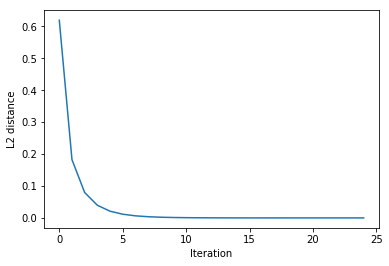

In [3]:
# Exercise 1
v = np.array([0.3, 0.3, 0.3])
A = np.array([[0.3, 0.6, 0.1],
              [0.5, 0.2, 0.3],
              [0.4, 0.1, 0.5]])
dis = []
x = np.arange(25)
for i in x:
    v_ = v * A
    l2 = np.sqrt(np.sum((v_ - v) ** 2))
    dis.append(l2)
    v = v_

plt.plot(x, dis)
plt.ylabel('L2 distance')
plt.xlabel('Iteration')
print(v)

L2 distance approach 0, this mean v_ = v = vA -> found the eigenvector for A which corresponding to eigenvalues = 1?


In [3]:
# Ex 2
from scipy.stats import uniform 
uniform?

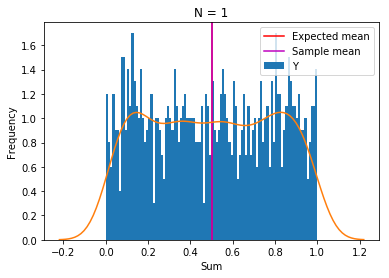

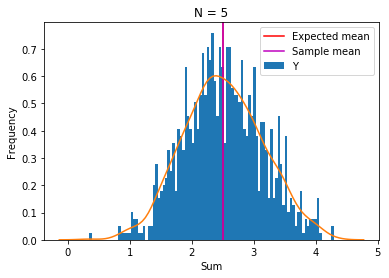

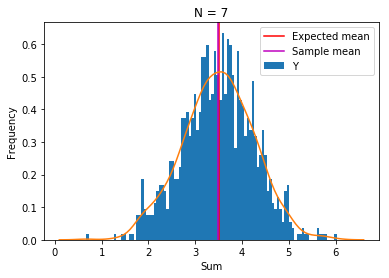

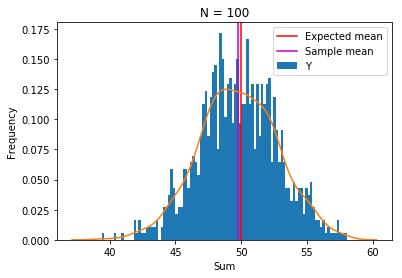

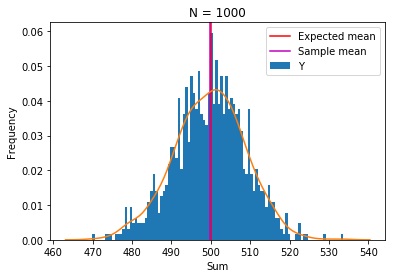

In [6]:
Ns = [1, 5, 7, 100, 1000]
for N in Ns:
    ys = []
    for i in range(1000):
        xs = uniform.rvs(size=N)
        y = xs.sum()
        ys.append(y)
    
    ys = np.array(ys)
    expected_mean = 0.5 * N
    sample_mean = ys.mean()
    
    plt.figure()
    plt.hist(ys, bins=100, normed=True, label='Y')
    plt.axvline(expected_mean, c='r', label='Expected mean')
    plt.axvline(sample_mean, c='m', label='Sample mean')
    sns.kdeplot(ys)
    plt.xlabel('Sum')
    plt.ylabel('Frequency')
    plt.legend()
    plt.xlim(0, N)
    
    plt.title('N = %d' %N)

N = 1 ~ uniform, N biger, to normal

In [5]:
# Load mnist
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/", one_hot=True)
train_images = mnist.train.images
train_labels = mnist.train.labels
print(train_images.shape)
print(train_labels.shape)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
(55000, 784)
(55000, 10)


In [6]:
def show(image):
    plt.figure()
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

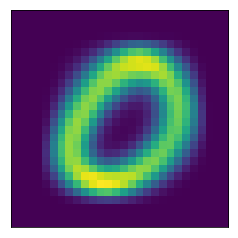

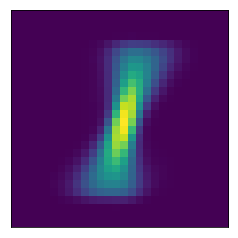

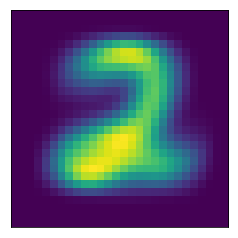

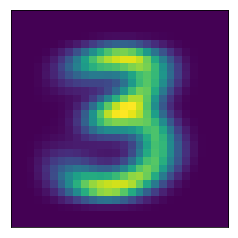

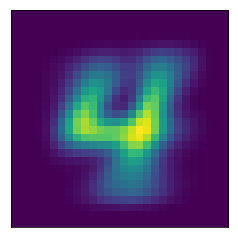

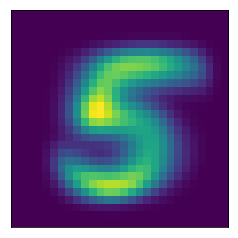

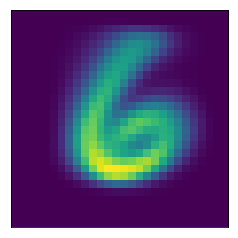

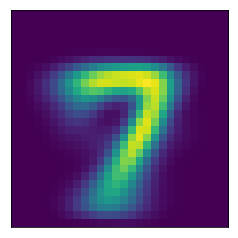

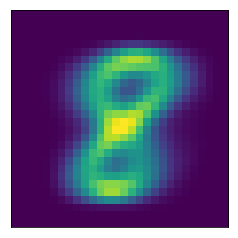

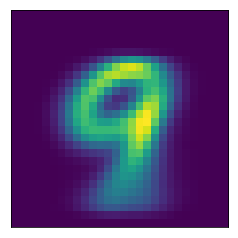

In [7]:
# Ex 3
mean_images = []
for i in range(10):
    mask = train_labels[:, i] == 1
    mean_image = train_images[mask].mean(axis=0).reshape((28, 28))
    mean_images.append(mean_image)
    show(mean_image)
    

Take 0.29


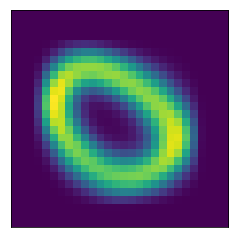

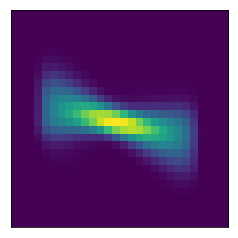

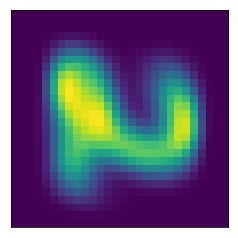

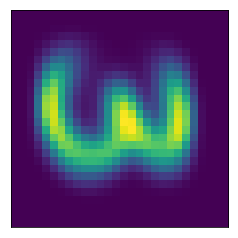

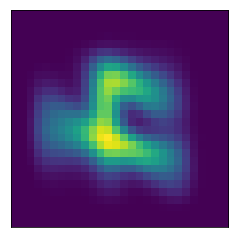

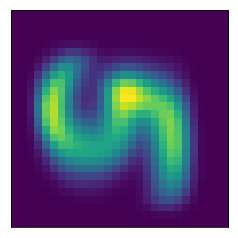

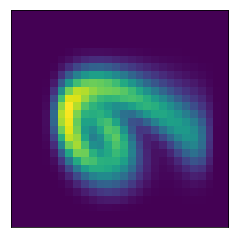

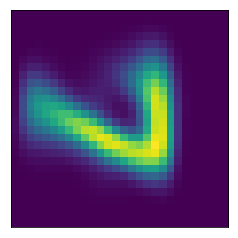

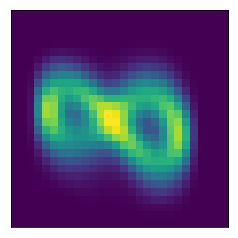

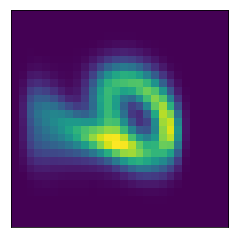

In [29]:
# Ex4 np rotate
import time
start = time.time()
for image in mean_images:
    rotated = np.rot90(image, axes=(1,0))
    show(rotated)
print('Take %.2f' % (time.time()-start))

Take 0.42


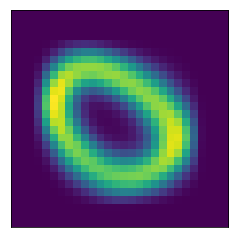

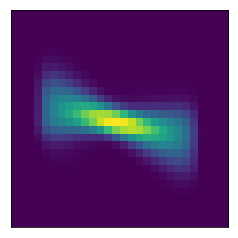

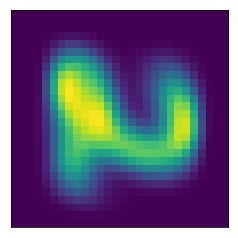

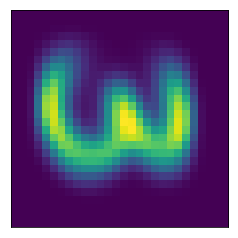

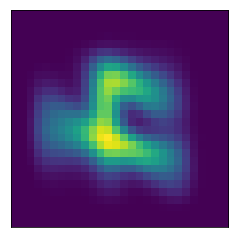

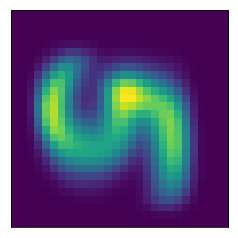

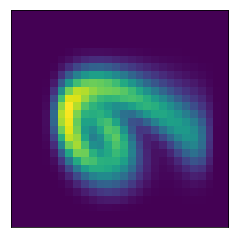

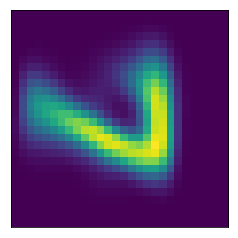

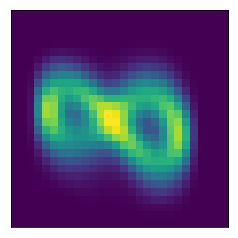

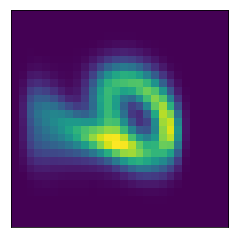

In [30]:
# Ex4 for loop rotate
start = time.time()
for image in mean_images:
    h, w = image.shape
    rotated = np.zeros((h, w))
    for i in range(h):
        for j in range(w):
            rotated[j, h-i-1] = image[i, j]
    show(rotated)
print('Take %.2f' % (time.time()-start))

In [43]:
# Ex5
def is_symmetric(matrix):
    h, w = matrix.shape
    return h == w and np.allclose(matrix, matrix.T)

a = np.array([[1, 7, 3],
              [7, 4, -5],
              [3, -5, 6]])

is_symmetric(a)

True

,X1,X2,Y
0,0.930369,-0.851227,True
1,-0.454636,0.503092,True
2,0.862216,0.014024,False
3,0.614225,-0.669622,True
4,-0.776993,-0.757423,False


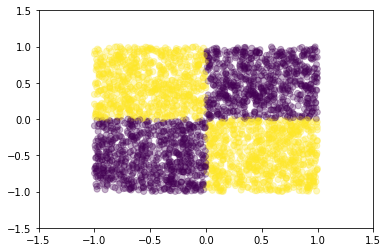

In [158]:
# Ex 6
X = np.random.uniform(low=-1, high=1, size=(3000, 2))
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
plt.scatter(X[:, 0], X[:, 1], c=Y, alpha=0.3)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
df = pd.DataFrame(dict(X1=X[:, 0], X2=X[:, 1], Y=Y))
df.to_csv('data/xor.csv', index=False)
df.head()

,X1,X2,Y
0,0.267313,-1.001553,0
1,-0.265975,-0.397813,1
2,0.094081,-0.957382,0
3,-0.136512,0.419927,1
4,0.856098,0.475887,0


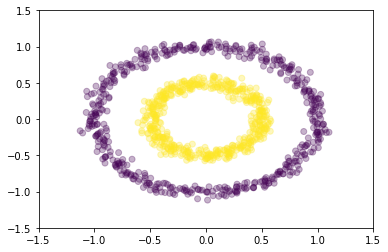

In [157]:
# Ex 7
from sklearn.datasets import make_circles
X, Y = make_circles(n_samples=1000, noise=0.05, factor=0.5)
plt.scatter(X[:, 0], X[:, 1], c=Y, alpha=0.3)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
df = pd.DataFrame(dict(X1=X[:, 0], X2=X[:, 1], Y=Y))
df.to_csv('data/circle.csv', index=False)
df.head()

,X1,X2,Y
0,-1.113628e-17,-0.090935,0.0
1,-1.991094e-03,-0.126113,0.0
2,-1.703933e-03,-0.053949,0.0
3,-6.345725e-03,-0.133887,0.0
4,-4.221447e-03,-0.066762,0.0


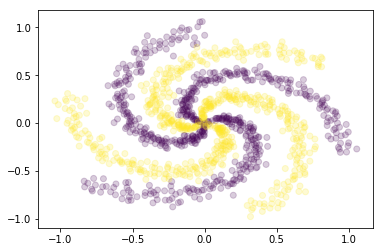

In [36]:
#Ex8
from math import pi
N = 200
n_classes = 2
n_spiral = 3
total = N * n_classes * n_spiral
delta = 6.5 * pi / (n_spiral + n_classes)
X1 = np.empty(total)
X2 = np.empty(total)
Y = np.empty(total)
for j in range(n_classes):
    for i in range(n_spiral):
        # (from: head's closeness, > 0:  head moveaway from tail , < 0: head closer tail, to: dont chane much)
        r = np.linspace(0.05, 1, N) + np.random.normal(scale=0.05, size=N)
        t = np.linspace((j-1) * pi + (j+i) * delta, j * pi + (j+i) * delta, N)
        fo = (n_spiral * j + i) * N
        to = (n_spiral * j + i + 1) * N
        X1[fo:to] = r*np.sin(t)
        X2[fo:to] = r*np.cos(t)
        Y[fo:to] = j

plt.scatter(X1, X2, c=Y, alpha=0.2)
df = pd.DataFrame(dict(X1=X1, X2=X2, Y=Y))
df.to_csv('data/spiral.csv', index=False)
df.head()

# How to make 3 spiral alternatively like in the exec :v

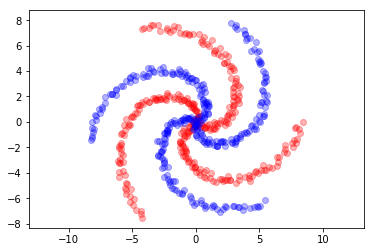

In [44]:
import math
sin = math.sin
cos = math.cos
radians = math.radians

def spiral_dataset(a, t, start, no_spiral):
    x = []
    y = []
    delta = 360 / no_spiral
    curent = start
    for _ in range(no_spiral):
        for i in np.linspace(0, t, 100):
            rt = a * radians(i)
            x.append(rt * cos(radians(i) + radians(curent)) + np.random.uniform(-0.3, 0.3))
            y.append(rt * sin(radians(i) + radians(curent)) + np.random.uniform(-0.3, 0.3))
        curent += delta
    return x, y

plt.axis('equal')
x1, y1 = spiral_dataset(3, 160, 200, 3)
plt.scatter(x1, y1, alpha=0.3, c="red")
x2, y2 = spiral_dataset(3, 160, 270, 3)
plt.scatter(x2, y2, alpha=0.3, c="blue")
plt.show()

## 